In [1]:
import numpy as np
import cv2
from matplotlib import pyplot
from ImageFunctions import *
import skimage.io, skimage.morphology
from skimage.filters.rank import gradient
import os
%matplotlib notebook

In [2]:
os.listdir("./")

['.idea',
 '.ipynb_checkpoints',
 'DetectStreamers.py',
 'discharge_segmentation.ipynb',
 'HotspotDetection.py',
 'image1.png',
 'image10.png',
 'image11.png',
 'image12.png',
 'image13.png',
 'image14.png',
 'image15.png',
 'image16.png',
 'image17.png',
 'image18.png',
 'image19.png',
 'image2.png',
 'image20.png',
 'image21.png',
 'image22.png',
 'image23.png',
 'image24.png',
 'image25.png',
 'image26.png',
 'image27.png',
 'image28.png',
 'image29.png',
 'image3.png',
 'image30.png',
 'image31.png',
 'image32.png',
 'image33.png',
 'image34.png',
 'image35.png',
 'image36.png',
 'image37.png',
 'image38.png',
 'image39.png',
 'image4.png',
 'image40.png',
 'image41.png',
 'image42.png',
 'image43.png',
 'image44.png',
 'image45.png',
 'image46.png',
 'image47.png',
 'image48.png',
 'image49.png',
 'image5.png',
 'image50.png',
 'image51.png',
 'image52.png',
 'image53.png',
 'image54.png',
 'image55.png',
 'image56.png',
 'image57.png',
 'image58.png',
 'image59.png',
 'image6.png

# Nadpis

scipy bivariatespline - na rozmazanie
rozmazať body
amplifikovať signál voči šumu

OBRAZ CISLO 22
(1024, 1024)


<IPython.core.display.Javascript object>


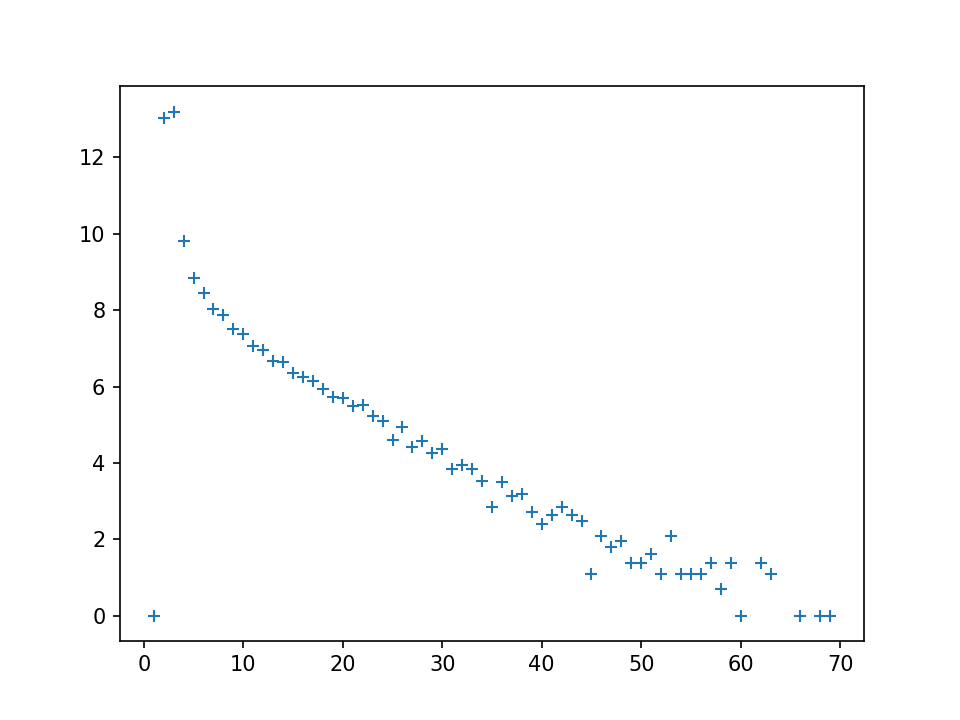

c:\python\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Javascript object>


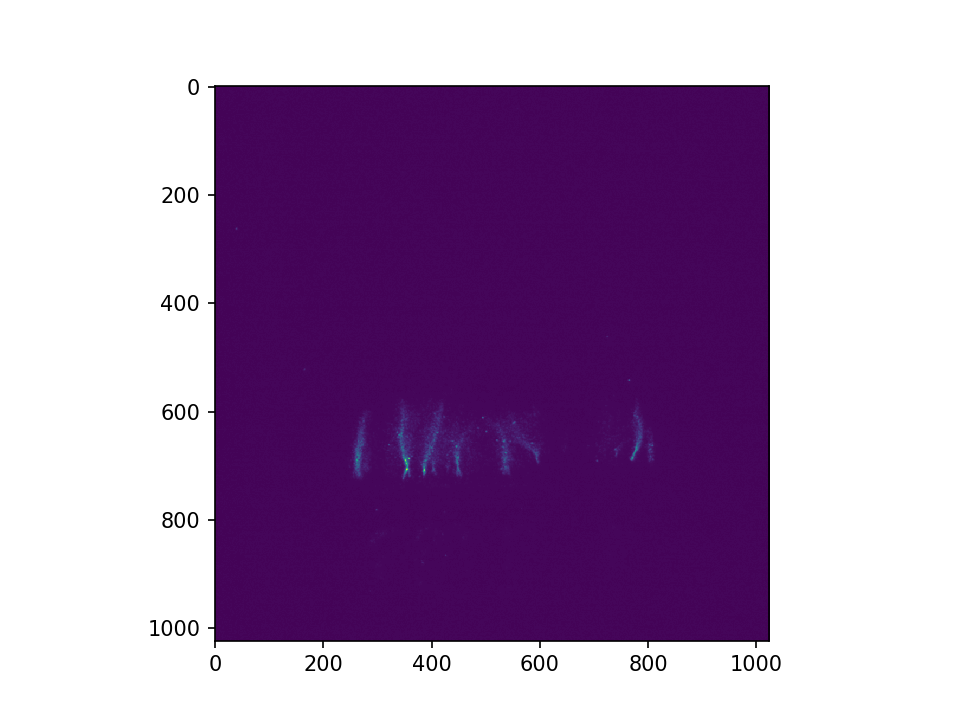

<IPython.core.display.Javascript object>


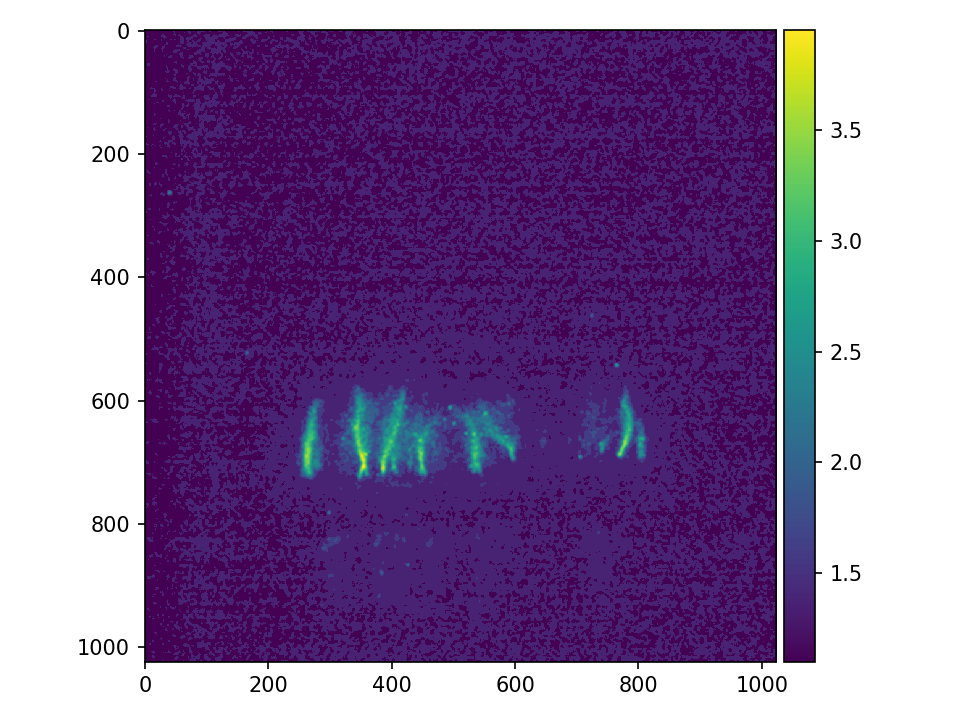

0
1402
92
40
9
592
15
24
27
19
1062
1058
12
1042393
9
29
37
12
634
31
9
568
9
74
17
32
38
151
9
15
9
14
134


c:\python\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


<IPython.core.display.Javascript object>


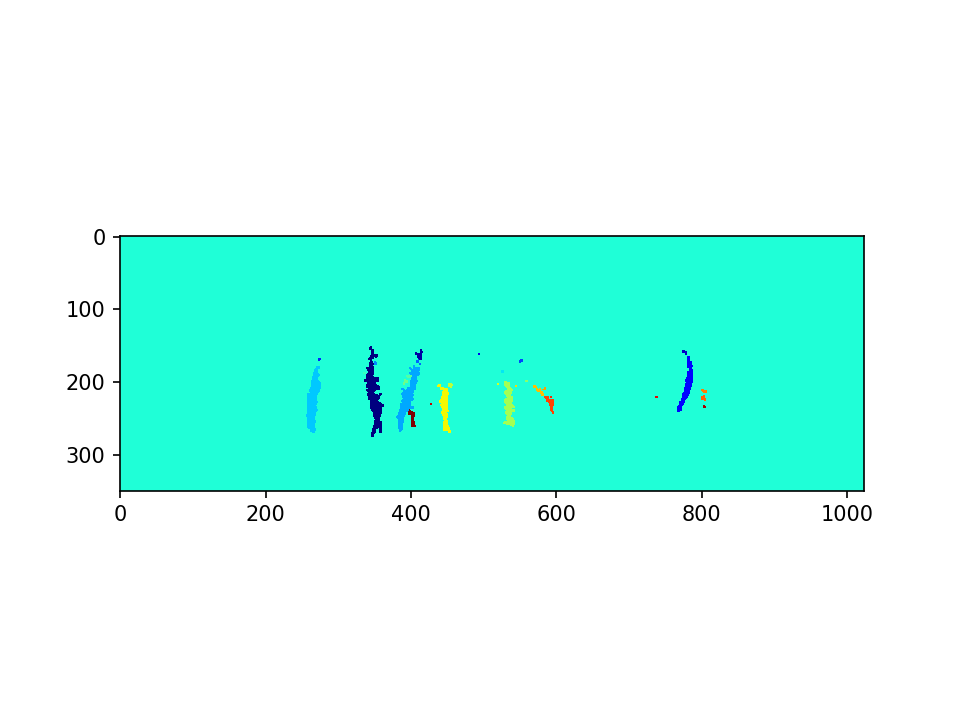

In [37]:
path = "./images_orig/"

for i in range(22,23):
    print("OBRAZ CISLO " + str(i))
    image_name = "0_1ms_9KV" + str(i) +".png"
    
    try:
        image = cv2.cvtColor(cv2.imread(path + image_name), cv2.COLOR_RGB2GRAY)
        image_orig = np.copy(image)
        image = cv2.convertScaleAbs(image)
        im = image
        print(image.shape)
        grad = gradient(image, np.ones((5,5)))
        image[image >4*np.mean(image)] = 255
        image[image < 255] = 0
        image = cv2.erode(image, np.ones((3,3)))
        image = cv2.dilate(image, np.ones((3,3)))

        label = skimage.morphology.label(image, neighbors=4)
        m = cv2.blur(image_orig,(5,5))
        pyplot.figure(i-2)
        #image_orig = cv2.equalizeHist(image_orig)
        pyplot.plot(np.log(cv2.calcHist([image_orig],[0],None,[256],[0,256])), "+")
        pyplot.show()
        pyplot.figure(i-1)
        pyplot.imshow(np.exp((image_orig.astype(np.float64) - np.median(image_orig)) / np.amax(image_orig.astype(np.float64))) - 1)
        pyplot.show()
        #m[m > 4] = 255
        #m[m < 5] = 0
        im = cv2.GaussianBlur(im, (25,5),4,1)
        watershed = skimage.morphology.watershed(im,label, mask = m)
        pyplot.figure(i)
        for j in range(np.amax(watershed) + 1):
            print(np.sum(watershed == j))
        skimage.io.imshow(np.log(m.astype(np.float64)+1))
        pyplot.figure(1000)
        pyplot.imshow(watershed[450:800], cmap = "jet")
        pyplot.savefig("image_m_blur_" + str(i) + ".png")
        
    except Exception as e:
        print(e)
        print(image_name)